In [63]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment


In [64]:
df = pd.read_csv('data/test-data/subsets/clean_train.csv')
df

,video_id,category,video_duration,channel_id,country,dialect,gender,transcript_duration
0,cwQtgQjZzz4,['News & Politics'],78,UClIjKh_JzA8Vgr0v6UqwdPQ,AT,MSA,Male,65.280000
1,5g_gYjrsuT8,['People & Blogs'],90,UCKQIefGkPnb0URKnkJdAs6A,SA,MSA,Male,78.204444
2,BzTDdeRNX0A,['People & Blogs'],223,UCSky_qvTeoO-c4AHsUSLxWw,DZ,MSA,Male,164.977778
3,d7ouP5Ce2aE,['People & Blogs'],605,UC3KGR_wGSNuOozXe7qxEV-A,ES,MSA,Male,496.622222
4,E6E1DuAPer0,['Education'],201,UC5hQOOQ7atQ9ZX57eZ_FHgw,SA,MSA,Male,163.377778
...,...,...,...,...,...,...,...,...
5063,-rRgKhYvKqI,['Film & Animation'],53,UCEg4_mU2CqqtQxWwzL_uh-w,QA,MSA,Male,30.222222
5064,LJNJHgvy0c0,['Education'],10,UCTRGcT1KQVoQA1vdNLlbjhw,KW,Kuwait,Male,6.497778
5065,guMSBGiChsc,['People & Blogs'],126,UClpx3Wo_sJ-M0rrXOKlnSRA,MA,Morocco,Male,68.622222
5066,kGwFnm7--Xg,['People & Blogs'],197,UClpx3Wo_sJ-M0rrXOKlnSRA,MA,Morocco,Male,108.693333


In [65]:
subtitles = os.listdir('data/test-data/subtitles')
subtitles[0:4]

['_yd3ot_Lv9A.ar.vtt',
 '_yF4zXGYuPc.ar.vtt',
 '_Yf8idle-dE.ar.vtt',
 '_yJ5keFAMT0.ar.vtt']

In [66]:
# read ar.vtt files using webvtt
import webvtt

file_pth  = subtitles[0]

vtt = webvtt.read('data/test-data/subtitles/_1_u02aTcVM.ar.vtt')

for i in vtt:
    print(i.start)
    print(i.end)
    print(i.text)

00:00:00.000
00:00:09.899
سؤال: ما حكم البيع على التصريف، بأن أضع
سلعتي عند صاحب المحل فأقول: هي عليك بكذا،
00:00:09.899
00:00:19.798
والذي تبيعه منها تحاسبني عليه، والذي لا
تبيعه أنا آخذه منك بدون أن تدفع لي شيئًا؟
00:00:19.798
00:00:29.697
الجواب: إن كانت هذه المعاملة على سبيل
البيع والعقد بين صاحب السلعة وصاحب المحل
00:00:29.697
00:00:39.596
فالمبيع مجهول قدره، فلا يصح العقد، وإن كان
على سبيل التوكيل في البيع بأن يبيعه نيابة
00:00:39.596
00:00:49.495
عنه فما يبيعه يأخذ أجرته عليه -أجرة المثل-،
وما يبقى يرده على صاحبه، فيكون من باب
00:00:49.500
00:00:59.400
الوكالة، فتصح هذه المعاملة.
00:01:14.200
00:01:18.700
لكن لو قال صاحب السلعة: (أنا أريد من
قيمتها كذا وما زاد عليه فهو لك)، فهذه أجرة
00:01:18.700
00:01:27.140
مجهولة، ولا تصح عند جمهور أهل العلم، وذكر
البخاري عن ابن عباس –رضي الله عنهما- أن هذا
00:01:27.140
00:01:29.091
من باب (المسلمون على شروطهم)
00:01:29.091
00:01:38.990
[البخاري: 3/92]، وأنه يستحق
00:01:38.990
00:01:48.889
ما زاد على قيمتها المحددة.


In [67]:
# make a dataframe of subtitles name and start and end time and text
import webvtt
import pandas as pd

subtitles = os.listdir('data/test-data/subtitles')
print(subtitles[0:4])
# remove .ar.vtt from the name
subtitles = [str(i).replace('.ar.vtt', '') for i in subtitles]
print(subtitles[0:4])

from tqdm import tqdm
new_df = {
    'video_id': [],
    'start': [],
    'end': [],
    'text': []
}
for file_pth in tqdm(subtitles):
    vtt = webvtt.read('data/test-data/subtitles/'+file_pth+'.ar.vtt')
    for i in vtt:
        new_df['video_id'].append(file_pth)
        new_df['start'].append(i.start)
        new_df['end'].append(i.end)
        new_df['text'].append(i.text)

new_df = pd.DataFrame(new_df)
new_df

['_yd3ot_Lv9A.ar.vtt', '_yF4zXGYuPc.ar.vtt', '_Yf8idle-dE.ar.vtt', '_yJ5keFAMT0.ar.vtt']
['_yd3ot_Lv9A', '_yF4zXGYuPc', '_Yf8idle-dE', '_yJ5keFAMT0']


100%|██████████| 15065/15065 [01:02<00:00, 239.38it/s]


,video_id,start,end,text
0,_yd3ot_Lv9A,00:00:00.360,00:00:08.680,حلف شمال الأطلسي قوة عسكرية دولية\nتعمل خارج م...
1,_yd3ot_Lv9A,00:00:09.720,00:00:16.360,اثنتا عشرة دولة أسست الحلف من أجل التصدي\nللمد...
2,_yd3ot_Lv9A,00:00:16.360,00:00:25.040,الحلف مقره بروكسل ويهدف إلى حماية أعضائه\nحتى ...
3,_yd3ot_Lv9A,00:00:26.000,00:00:34.360,الخلافات دبت داخل الحلف في فترات مختلفة\nفرنسا...
4,_yd3ot_Lv9A,00:00:35.760,00:00:43.200,بعد انهيار الاتحاد السوفيتي وحل\nحلف وارسو أصب...
...,...,...,...,...
1220989,zxASj4aWoi0,00:03:15.414,00:03:18.207,هويتك عشقتك كرهتك نعم
1220990,zxASj4aWoi0,00:03:18.475,00:03:21.502,كرهتك لأنك مجرد قناع
1220991,zxASj4aWoi0,00:03:21.765,00:03:25.204,و كم مسرحية بطلها الألم
1220992,zxASj4aWoi0,00:03:27.340,00:03:28.372,غرامك...


In [68]:
# make a dictionary of video_id and dialect from df
video_id_dialect = {}
for i in range(len(df)):
    video_id_dialect[df['video_id'][i]] = df['dialect'][i]

In [69]:
# use video_id_dialect to fill null values in new_df
new_df['dialect'] = None
new_df = new_df[new_df['video_id'].isin(video_id_dialect.keys())]
new_df['dialect'] = new_df['video_id'].apply(lambda x: video_id_dialect[x])


/tmp/ipykernel_11037/3544552078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dialect'] = new_df['video_id'].apply(lambda x: video_id_dialect[x])


In [70]:
new_df

,video_id,start,end,text,dialect
0,_yd3ot_Lv9A,00:00:00.360,00:00:08.680,حلف شمال الأطلسي قوة عسكرية دولية\nتعمل خارج م...,MSA
1,_yd3ot_Lv9A,00:00:09.720,00:00:16.360,اثنتا عشرة دولة أسست الحلف من أجل التصدي\nللمد...,MSA
2,_yd3ot_Lv9A,00:00:16.360,00:00:25.040,الحلف مقره بروكسل ويهدف إلى حماية أعضائه\nحتى ...,MSA
3,_yd3ot_Lv9A,00:00:26.000,00:00:34.360,الخلافات دبت داخل الحلف في فترات مختلفة\nفرنسا...,MSA
4,_yd3ot_Lv9A,00:00:35.760,00:00:43.200,بعد انهيار الاتحاد السوفيتي وحل\nحلف وارسو أصب...,MSA
...,...,...,...,...,...
1220333,zWYpN9XepFo,00:08:18.260,00:08:26.440,هدفك هو ظاهرة أوسع و أعظم من الحياة نفسها، ومن...,MSA
1220334,zWYpN9XepFo,00:08:26.440,00:08:36.280,هو السبب الذي يدفعك خارج الفراش كل يوم، وهو ال...,MSA
1220335,zWYpN9XepFo,00:08:36.800,00:08:47.880,يتّخذ الهدف العديد من الأشكال. ربما تريد أن تك...,MSA
1220336,zWYpN9XepFo,00:08:47.880,00:08:52.680,كل هذه الأشياء أكبر من الأهداف العادية للحياة ...,MSA


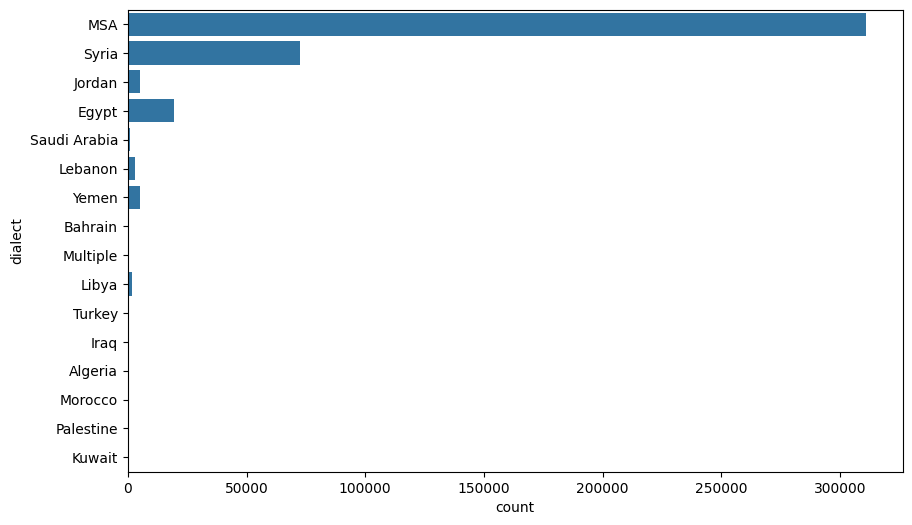

In [71]:
# get dialects plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(new_df['dialect'])
plt.show()

 

In [72]:
# Jordan videos 
Jordan_and_syria_Egypt_df = new_df[new_df['dialect'].isin(['Syria'])]
# Jordan_and_syria_Egypt_df = new_df
Jordan_and_syria_Egypt_df

,video_id,start,end,text,dialect
1857,-0R1I26YwAE,00:00:10.944,00:00:14.656,موسوعة النابلسي للعلوم الأسلامية,Syria
1858,-0R1I26YwAE,00:00:14.656,00:00:16.650,محاضرات وندوات مصورة - الأردن,Syria
1859,-0R1I26YwAE,00:00:16.650,00:00:18.650,جامع التقوى – الحلقة 017 : الحركة متنوعة,Syria
1860,-0R1I26YwAE,00:00:18.650,00:00:21.488,لفضيلة الدكتور محمد راتب النابلسي بتاريخ: 2014...,Syria
1861,-0R1I26YwAE,00:00:21.696,00:00:22.048,الحمد لله رب العالمين ، والصلاة والسلام على سي...,Syria
...,...,...,...,...,...
1219918,zWNaOAbOvBU,00:27:32.000,00:27:37.000,أثرنا ولا تأثر علينا أرضنا وأرضا عنا,Syria
1219919,zWNaOAbOvBU,00:27:37.000,00:27:40.000,وصلى الله على سيدنا محمد النبي الأمي,Syria
1219920,zWNaOAbOvBU,00:27:40.000,00:27:43.000,وعلى أله وصحبه وسلم,Syria
1219921,zWNaOAbOvBU,00:27:43.000,00:27:48.000,والحمد لله رب العالمين,Syria


In [73]:
Jordan_and_syria_Egypt_df.to_csv('Syria01.csv', index=False)

In [74]:
# cast start and end to datetime
Jordan_and_syria_Egypt_df['start'] = pd.to_datetime(Jordan_and_syria_Egypt_df['start'], errors='coerce')
Jordan_and_syria_Egypt_df['end'] = pd.to_datetime(Jordan_and_syria_Egypt_df['end'], errors='coerce')

# drop rows with errors
for i, row in Jordan_and_syria_Egypt_df.iterrows():
    try:
        pd.Timestamp(row['start'])
        pd.Timestamp(row['end'])
    except ValueError:
        Jordan_and_syria_Egypt_df.drop(i, inplace=True)

Jordan_and_syria_Egypt_df

/tmp/ipykernel_11037/570908428.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Jordan_and_syria_Egypt_df['start'] = pd.to_datetime(Jordan_and_syria_Egypt_df['start'], errors='coerce')
/tmp/ipykernel_11037/570908428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jordan_and_syria_Egypt_df['start'] = pd.to_datetime(Jordan_and_syria_Egypt_df['start'], errors='coerce')
/tmp/ipykernel_11037/570908428.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Jordan_and_syria_

,video_id,start,end,text,dialect
1857,-0R1I26YwAE,2023-10-24 00:00:10.944,2023-10-24 00:00:14.656,موسوعة النابلسي للعلوم الأسلامية,Syria
1858,-0R1I26YwAE,2023-10-24 00:00:14.656,2023-10-24 00:00:16.650,محاضرات وندوات مصورة - الأردن,Syria
1859,-0R1I26YwAE,2023-10-24 00:00:16.650,2023-10-24 00:00:18.650,جامع التقوى – الحلقة 017 : الحركة متنوعة,Syria
1860,-0R1I26YwAE,2023-10-24 00:00:18.650,2023-10-24 00:00:21.488,لفضيلة الدكتور محمد راتب النابلسي بتاريخ: 2014...,Syria
1861,-0R1I26YwAE,2023-10-24 00:00:21.696,2023-10-24 00:00:22.048,الحمد لله رب العالمين ، والصلاة والسلام على سي...,Syria
...,...,...,...,...,...
1219918,zWNaOAbOvBU,2023-10-24 00:27:32.000,2023-10-24 00:27:37.000,أثرنا ولا تأثر علينا أرضنا وأرضا عنا,Syria
1219919,zWNaOAbOvBU,2023-10-24 00:27:37.000,2023-10-24 00:27:40.000,وصلى الله على سيدنا محمد النبي الأمي,Syria
1219920,zWNaOAbOvBU,2023-10-24 00:27:40.000,2023-10-24 00:27:43.000,وعلى أله وصحبه وسلم,Syria
1219921,zWNaOAbOvBU,2023-10-24 00:27:43.000,2023-10-24 00:27:48.000,والحمد لله رب العالمين,Syria


In [75]:
Jordan_and_syria_Egypt_df['duration'] = Jordan_and_syria_Egypt_df['end'] - Jordan_and_syria_Egypt_df['start']


/tmp/ipykernel_11037/3087602219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jordan_and_syria_Egypt_df['duration'] = Jordan_and_syria_Egypt_df['end'] - Jordan_and_syria_Egypt_df['start']


In [76]:
all_dutartion = Jordan_and_syria_Egypt_df['duration'].sum()
all_dutartion_in_hours = all_dutartion.total_seconds() / 3600
print('all_dutartion_in_hours: ', all_dutartion_in_hours)

all_dutartion_in_hours:  92.82870194444445


In [77]:
# Jordan_and_syria_Egypt_df.to_csv('Syria.csv', index=False)